# 1. Modelo SEIRD

Este modelo extende o modelo SIR mais básico para comportamento de epidemias, ele adiciona o fator "Exposto" que funciona como se um indivídio tenha sido infectado e esteja portando o vírus no estado de incubação.

$\frac{\beta S I}{N}$ = é a taxa de população suscetível quando encontra com a taxa de população infectada resultando em uma transmissão de doença, tal que:

$\beta$ = taxa de infecção.

$\alpha E$ = é a taxa da população que foi exposta de se tornar parte da população infectada tal que o tempo de incubação do vírus é descrito por 1$\alpha$.

$\frac{\gamma I}{1 -\rho}$ = é a taxa da população infectada que consegue se recuperar e adquirir resitência contra o vírus removendo a taxa de mortos causados pelo fator $\rho$.

$\frac{\rho}{1 - \rho}$ $\gamma I$ = taxa de mortalidade multiplicada pela taxa de população infectada, para ter uma média de mortos que a doença irá provocar.

**N** = Amostra populacional total.

**S** = Suscetíveis.

**E**: A parte da população que foi exposta à doença mas ainda não está infectada.

**I** = Infectados.

**R** = Recuperados

onde  S + E + I + R = 1  é invariável.

Eu adicionei o fator "mortos" como uma % de pessoas que morrem após estarem infectadas, representada pela letra grega $\rho$.
Teremos apartir do modelo SEIR o modelo SEIRD.

onde  S + E + I + R + D = 1  é invariável.

$\rho$ = taxa de mortalidade

**D** = Mortos



# OBS: *logo mais à frente irei adicionar mudanças gradativas no modelo até chegar à um modelo mais aproximado.*

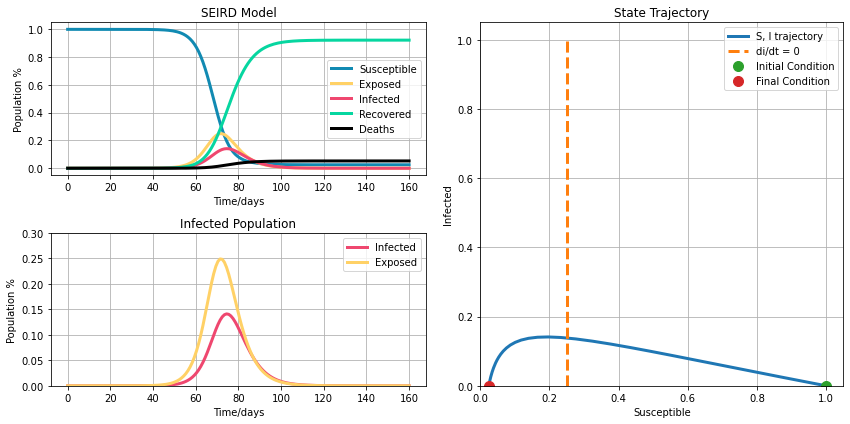

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
N = 9.278*(10**6)            # população de PE
R0 = 4.0

t_incubation = 5.1
t_infective = 3.3

# initial number of infected and recovered individuals
e_initial = 1/N                                               #expostos
i_initial = 0.00                                              #infectados
r_initial = 0.00                                              #recuperados
d_initial = 0.00                                              #mortos
s_initial = 1 - e_initial - i_initial - r_initial- d_initial  #suscetíveis

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma
rho = 0.05404

# modelo SEIRD.
def SEIRD(x, t, alpha, beta, gamma, rho):
    s, e, i, r, d = x
    dsdt = -beta * s * i
    dedt =  beta * s * i - alpha * e
    didt =  alpha * e - (gamma * i)/(1 - rho)
    drdt =  gamma * i
    dddt =  rho/(1-rho) * gamma * i
    return [dsdt, dedt, didt, drdt, dddt]

t = np.linspace(0, 160, 160)
x_initial = s_initial, e_initial, i_initial, r_initial, d_initial
soln = odeint(SEIRD, x_initial, t, args=(alpha, beta, gamma, rho))
s, e, i, r, d = soln.T

def plotdata(t, s, i, e, r, d):
    # plot the data
    fig = plt.figure(figsize=(12,6))
    ax = [fig.add_subplot(221, axisbelow=True), 
          fig.add_subplot(223),
          fig.add_subplot(122)]
    
    ax[0].set_title('SEIRD Model')
    ax[0].plot(t, s, '#118ab2', lw=3, label='Susceptible')
    ax[0].plot(t, e, '#ffd166', lw=3, label='Exposed')
    ax[0].plot(t, i, '#ef476f', lw=3, label='Infected')
    ax[0].plot(t, r, '#06d6a0', lw=3, label='Recovered')
    ax[0].plot(t, d, '#000000', lw=3, label='Deaths')
    ax[0].set_xlabel('Time/days')
    ax[0].set_ylabel('Population %')
    
    ax[1].set_title('Infected Population')
    ax[1].plot(t, i, '#ef476f', lw=3, label='Infected')
    ax[1].plot(t, e, '#ffd166', lw=3, label='Exposed')
    ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time/days')
    ax[1].set_ylabel('Population %')

    ax[2].plot(s, i, lw=3, label='S, I trajectory')
    ax[2].plot([1/R0, 1/R0], [0, 1], '--', lw=3, label='di/dt = 0')
    ax[2].plot(s[0], i[0], '.', ms=20, label='Initial Condition')
    ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
    ax[2].set_title('State Trajectory')
    ax[2].set_aspect('equal')
    ax[2].set_ylim(0, 1.05)
    ax[2].set_xlim(0, 1.05)
    ax[2].set_xlabel('Susceptible')
    ax[2].set_ylabel('Infected')

    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout() 
plotdata(t, s, i, e, r, d)

no gráfico(2) acima dando um zoom no gráfico(1) percebe-se melhor as curvaturas entre infectados/expostos 

a adição da parte da população que foi exposta ao modelo mais comum (SIR) faz com que o surto da doença tenha um retardo, mas o número de infectados não diminui uma vez que em algum momento "X dias" o vírus irá eclodir e a pessoa que era considerada "Exposta" irá para a categoria "Infectada".

# 1.1 Modelo SEIRD com fator distanciamento social

Nas últimas páginas desse artigos tem alguns gráficos mostrando o efeito do distanciamento social, e que tentei reproduzir no meu projeto.
**"Effectiveness of control strategies for Coronavirus Disease 2019: a SEIR dynamic modeling study."**
https://www.medrxiv.org/content/10.1101/2020.02.19.20025387v3.full.pdf


Para modelar o fato de distanciamento vou assumir um parâmetro de controle $\psi$ indicando a eficácia dos esforçoes de distanciamento social tal que $\psi$ = 0 seria nenhum tipo de controle ou distanciamento social e $\psi$ = 1 corresponse à uma quarentena perfeita de indivíduos que se infectaram, escolhi trabalhar dessa forma para demonstrar os efeitos de um isolamento social na população de Pernambuco.

$\text{Suscetíveis}
\xrightarrow{(1-\psi)\frac{\beta S I}{N}} 
\text{Expostos} 
\xrightarrow{\alpha E} 
\text{Infectados} 
\xrightarrow{\gamma I} 
\text{Recuperados}$

${(1-\psi)}\frac{\beta S I}{N}$ = taxa da população infectada com o fator $\psi$ (% de isolamento social).

In [2]:
#nessa célula você pode manipular o valor de "psi" para observar as mudanças na curva que meu código abaixo irá plotar 
u = 0.2    # 0 sem isolamento social : 1 isolamento social perfeito

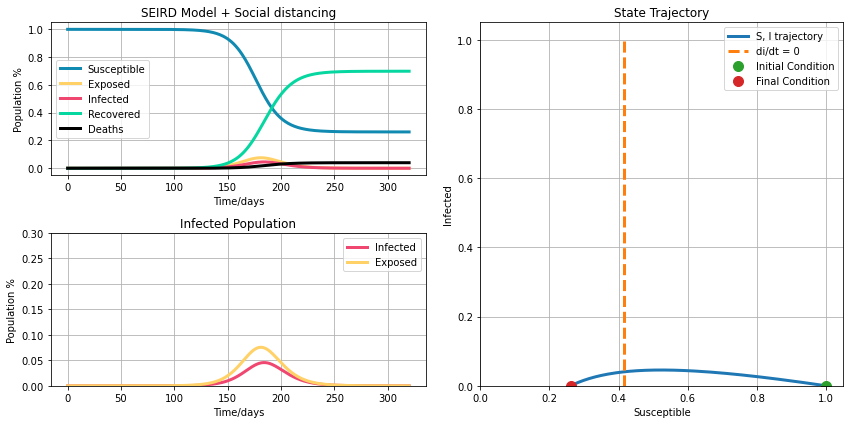

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
N = 9.278*(10**6)             # população de PE
#u = 0.0                      # coloquei a variável para fora para ter uma iteração melhor para quem estiver observando
R0 = 2.4  
t_incubation = 5.1
t_infective = 3.3

# initial number of infected and recovered individuals
e_initial = 1/N                                               #expostos
i_initial = 0.00                                              #infectados
r_initial = 0.00                                              #recuperados
d_initial = 0.00                                              #mortos
s_initial = 1 - e_initial - i_initial - r_initial- d_initial  #suscetíveis

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma
rho = 0.05404

# modelo SEIRD com distanciamento social.
def SEIRD_social_dist(x, t, alpha, beta, gamma, rho, u):
    s, e, i, r, d = x
    dsdt = -(1-u) * beta * s * i
    dedt =  (1-u) * beta * s * i - alpha * e
    didt =  alpha * e - (gamma * i)/(1 - rho)
    drdt =  gamma * i
    dddt =  rho/(1-rho) * gamma * i
    return [dsdt, dedt, didt, drdt, dddt]

t = np.linspace(0, 320, 320)
x_initial = s_initial, e_initial, i_initial, r_initial, d_initial
soln = odeint(SEIRD_social_dist, x_initial, t, args=(alpha, beta, gamma, rho, u))
s, e, i, r, d = soln.T

def plotdata(t, s, i, e, r, d):
    # plot the data
    fig = plt.figure(figsize=(12,6))
    ax = [fig.add_subplot(221, axisbelow=True), 
          fig.add_subplot(223),
          fig.add_subplot(122)]
    
    ax[0].set_title('SEIRD Model + Social distancing')
    ax[0].plot(t, s, '#118ab2', lw=3, label='Susceptible')
    ax[0].plot(t, e, '#ffd166', lw=3, label='Exposed')
    ax[0].plot(t, i, '#ef476f', lw=3, label='Infected')
    ax[0].plot(t, r, '#06d6a0', lw=3, label='Recovered')
    ax[0].plot(t, d, '#000000', lw=3, label='Deaths')
    ax[0].set_xlabel('Time/days')
    ax[0].set_ylabel('Population %')
    
    ax[1].set_title('Infected Population')
    ax[1].plot(t, i, '#ef476f', lw=3, label='Infected')
    ax[1].plot(t, e, '#ffd166', lw=3, label='Exposed')
    ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time/days')
    ax[1].set_ylabel('Population %')

    ax[2].plot(s, i, lw=3, label='S, I trajectory')
    ax[2].plot([1/R0, 1/R0], [0, 1], '--', lw=3, label='di/dt = 0')
    ax[2].plot(s[0], e[0], '.', ms=20, label='Initial Condition')
    ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
    ax[2].set_title('State Trajectory')
    ax[2].set_aspect('equal')
    ax[2].set_ylim(0, 1.05)
    ax[2].set_xlim(0, 1.05)
    ax[2].set_xlabel('Susceptible')
    ax[2].set_ylabel('Infected')

    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout() 
plotdata(t, s, i, e, r, d)

Distanciamento social tem efeitos visíveis no gráfico

1. Diminuindo consideravelmente a transmissão da doença.
2. Reduzindo a porcentagem da população infectada em qualquer ponto do gráfico no tempo, acarretando na redução da sobrecarga dos sistemas de saúdes públicos.
3. Reduzindo expressivamente o número de infectados, isso para uma doença que tem uma taxa de mortalidade diferente de 0, pode salvar vidas.

# 1.2 Adicionando dados mais fiéis para o estado de Pernambuco
## adicionando runge-kutta 

Algumas pesquisas científicas apontam que existe uma taxa de transmissão diferente para indivíduos sintomáticos para indivíduos assintomáticos assim como para suas respectivas recuperações


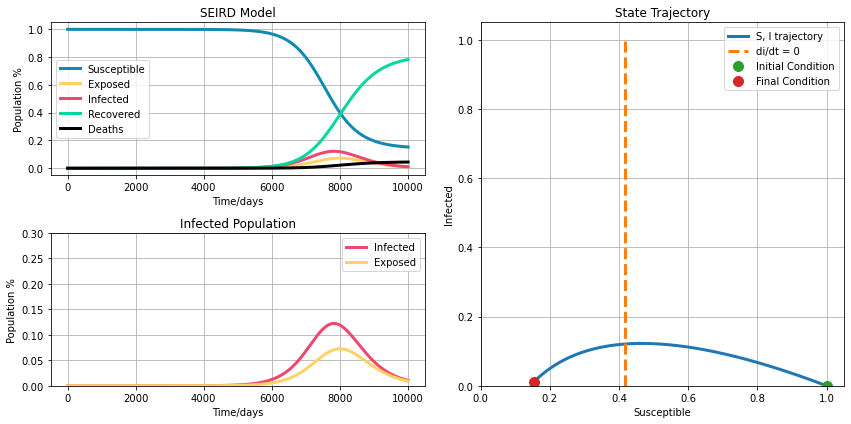

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
N = 9.278*(10**6)            # população de PE
u = 0.0                      # % das pessoas que respeitam o isolamento social
R0 = 2.4  
t_incubation = 5.1
t_infective = 3.3

# initial number of infected and recovered individuals
e_initial = 1/N                                               #expostos
i_initial = 0.00                                              #infectados
r_initial = 0.00                                              #recuperados
d_initial = 0.00                                              #mortos
s_initial = 1 - e_initial - i_initial - r_initial- d_initial  #suscetíveis

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma
rho = 0.05404

# passo do Runge-Kutta
hs = 0.1

# plot 0 -> 36500 por causa do runge kutta
t = np.linspace(0, 10000, 10000)

# modelo SEIRD com distanciamento social.
def SEIRD_social_dist(x, t, alpha, beta, gamma, rho, u):
    s, e, i, r, d = x
    dsdt = -(1-u) * beta * s * i
    dedt =  (1-u) * beta * s * i - alpha * e
    didt =  alpha * e - (gamma * i)/(1 - rho)
    drdt =  gamma * i
    dddt =  rho/(1-rho) * gamma * i
    return [dsdt, dedt, didt, drdt, dddt]

# Runge-Kutta de quarta ordem para 5 dimensões
def rK4(S, E, I, R, D, beta, gamma, rho, hs):
    x = [S, E, I, R, D]
    s1, e1, i1, r1, d1 = SEIRD_social_dist(x, t, alpha, beta, gamma, rho, u)
    s1 *= hs;
    e1 *= hs;
    i1 *= hs;
    r1 *= hs;
    d1 *= hs;
    
    sk = S + s1*0.5
    ek = E + e1*0.5
    ik = I + i1*0.5
    rk = R + r1*0.5
    dk = D + d1*0.5
    
    x = [s1, e1, i1, r1, d1]
    s2, e2, i2, r2, d2 = SEIRD_social_dist(x, t, alpha, beta, gamma, rho, u)
    s2 *= hs;
    e2 *= hs;
    i2 *= hs;
    r2 *= hs;
    d2 *= hs;
    
    
    sk = S + s2*0.5
    ek = E + e2*0.5
    ik = I + i2*0.5
    rk = R + r2*0.5
    dk = D + d2*0.5
    
    x = [s2, e2, i2, r2, d2]
    s3, e3, i3, r3, d3 = SEIRD_social_dist(x, t, alpha, beta, gamma, rho, u)
    s3 *= hs;
    e3 *= hs;
    i3 *= hs;
    r3 *= hs;
    d3 *= hs;
    
    
    sk = S + s3*0.5
    ek = E + e3*0.5
    ik = I + i3*0.5
    rk = R + r3*0.5
    dk = D + d3*0.5
    
    x = [s3, e3, i3, r3, d3]
    s4, e4, i4, r4, d4 = SEIRD_social_dist(x, t, alpha, beta, gamma, rho, u)
    s4 *= hs;
    e4 *= hs;
    i4 *= hs;
    r4 *= hs;
    d4 *= hs;   
    
    S = S + (s1 + 2*(s2 + s3) + s4)/6
    E = E + (e1 + 2*(e2 + e3) + e4)/6
    I = I + (i1 + 2*(i2 + i3) + i4)/6
    R = R + (r1 + 2*(r2 + r3) + r4)/6
    D = D + (d1 + 2*(d2 + d3) + d4)/6
    
    return S, E, I, R, D

s, e, i, r, d = [],[],[],[],[]
for j in range(10000): # Run for a certain number of time-steps
    s.append(s_initial)
    e.append(e_initial)
    i.append(i_initial)
    r.append(r_initial)
    d.append(d_initial)
    s_initial, e_initial, i_initial, r_initial, d_initial = rK4(s_initial, e_initial, i_initial, r_initial, d_initial, beta, gamma, rho, hs)


def plotdata(t, s, e, i, r, d):
    # plot the data
    fig = plt.figure(figsize=(12,6))
    ax = [fig.add_subplot(221, axisbelow=True), 
          fig.add_subplot(223),
          fig.add_subplot(122)]
    
    ax[0].set_title('SEIRD Model')
    ax[0].plot(t, s, '#118ab2', lw=3, label='Susceptible')
    ax[0].plot(t, e, '#ffd166', lw=3, label='Exposed')
    ax[0].plot(t, i, '#ef476f', lw=3, label='Infected')
    ax[0].plot(t, r, '#06d6a0', lw=3, label='Recovered')
    ax[0].plot(t, d, '#000000', lw=3, label='Deaths')
    ax[0].set_xlabel('Time/days')
    ax[0].set_ylabel('Population %')
    
    ax[1].set_title('Infected Population')
    ax[1].plot(t, i, '#ef476f', lw=3, label='Infected')
    ax[1].plot(t, e, '#ffd166', lw=3, label='Exposed')
    ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time/days')
    ax[1].set_ylabel('Population %')

    ax[2].plot(s, i, lw=3, label='S, I trajectory')
    ax[2].plot([1/R0, 1/R0], [0, 1], '--', lw=3, label='di/dt = 0')
    ax[2].plot(s[0], i[0], '.', ms=20, label='Initial Condition')
    ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
    ax[2].set_title('State Trajectory')
    ax[2].set_aspect('equal')
    ax[2].set_ylim(0, 1.05)
    ax[2].set_xlim(0, 1.05)
    ax[2].set_xlabel('Susceptible')
    ax[2].set_ylabel('Infected')

    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout() 
plotdata(t, s, i, e, r, d)

Aqui podemos observar que ao utilizar o Runge-Kutta as curvas ficam mais acentuadas e com um aspecto mais natural dos efeitos da pandemia do COVID-19. Todos os gráfico usaram dados do COVID para o estado de PE, e estão usando a população total do Estado de pernambuco representado po **N**.

Análise feita para os dados do dia "22/10 20:00" retirados do site https://covid.saude.gov.br/
taxa de mortalidade  = 0,054044



# 2. Previsão dos próximos dias apartir de hoje (dados de 27/10/2020)

Aqui eu tento fazer uma previsão apartir dos dados que temos no dia atual para como irá se comportar a curva da epidemia no estado de PE.

Dados extraídos do Google sobre o mapa de PE 27/10/2020 

https://www.google.com/search?q=covid+pe+dados&oq=covid+pe+dados&aqs=chrome..69i57j0l6j69i60.3210j0j7&sourceid=chrome&ie=UTF-8

0.19247801250269456


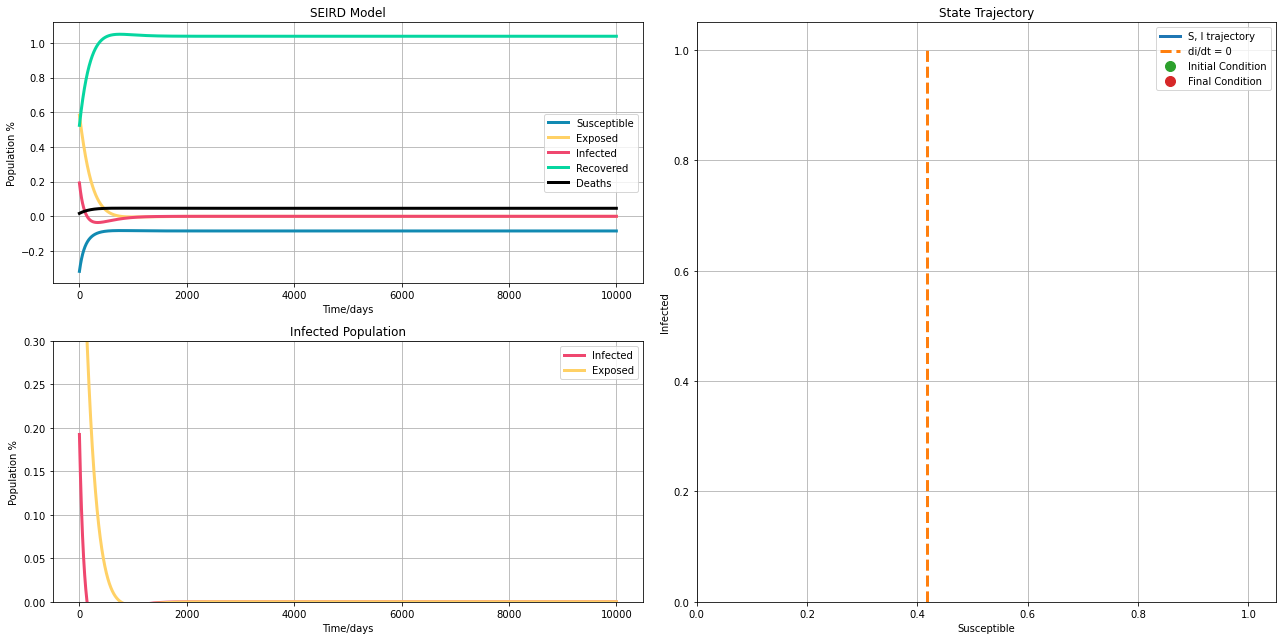

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
N = 9.278*(10**6)            # população de PE
u = 0.0                      # % das pessoas que respeitam o isolamento social
R0 = 2.4  
t_incubation = 5.1
t_infective = 3.3

# initial number of infected and recovered individuals
e_initial = 1785811.00/N                                        #expostos
i_initial = 5411550.00/N                                        #infectados
r_initial = 4865930.00/N                                        #recuperados
d_initial = 157451.00/N                                         #mortos
s_initial = 1 - e_initial - i_initial - r_initial- d_initial    #suscetíveis

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma
rho = 0.05404

# passo do Runge-Kutta
hs = 0.1

# plot 0 -> 36500 por causa do runge kutta
t = np.linspace(0, 10000, 10000)

# modelo SEIRD com distanciamento social.
def SEIRD_social_dist(x, t, alpha, beta, gamma, rho, u):
    s, e, i, r, d = x
    dsdt = -(1-u) * beta * s * i
    dedt =  (1-u) * beta * s * i - alpha * e
    didt =  alpha * e - (gamma * i)/(1 - rho)
    drdt =  gamma * i
    dddt =  rho/(1-rho) * gamma * i
    return [dsdt, dedt, didt, drdt, dddt]

# Runge-Kutta de quarta ordem para 5 dimensões
def rK4(S, E, I, R, D, beta, gamma, rho, hs):
    x = [S, E, I, R, D]
    s1, e1, i1, r1, d1 = SEIRD_social_dist(x, t, alpha, beta, gamma, rho, u)
    s1 *= hs;
    e1 *= hs;
    i1 *= hs;
    r1 *= hs;
    d1 *= hs;
    
    sk = S + s1*0.5
    ek = E + e1*0.5
    ik = I + i1*0.5
    rk = R + r1*0.5
    dk = D + d1*0.5
    
    x = [s1, e1, i1, r1, d1]
    s2, e2, i2, r2, d2 = SEIRD_social_dist(x, t, alpha, beta, gamma, rho, u)
    s2 *= hs;
    e2 *= hs;
    i2 *= hs;
    r2 *= hs;
    d2 *= hs;
    
    
    sk = S + s2*0.5
    ek = E + e2*0.5
    ik = I + i2*0.5
    rk = R + r2*0.5
    dk = D + d2*0.5
    
    x = [s2, e2, i2, r2, d2]
    s3, e3, i3, r3, d3 = SEIRD_social_dist(x, t, alpha, beta, gamma, rho, u)
    s3 *= hs;
    e3 *= hs;
    i3 *= hs;
    r3 *= hs;
    d3 *= hs;
    
    
    sk = S + s3*0.5
    ek = E + e3*0.5
    ik = I + i3*0.5
    rk = R + r3*0.5
    dk = D + d3*0.5
    
    x = [s3, e3, i3, r3, d3]
    s4, e4, i4, r4, d4 = SEIRD_social_dist(x, t, alpha, beta, gamma, rho, u)
    s4 *= hs;
    e4 *= hs;
    i4 *= hs;
    r4 *= hs;
    d4 *= hs;   
    
    S = S + (s1 + 2*(s2 + s3) + s4)/6
    E = E + (e1 + 2*(e2 + e3) + e4)/6
    I = I + (i1 + 2*(i2 + i3) + i4)/6
    R = R + (r1 + 2*(r2 + r3) + r4)/6
    D = D + (d1 + 2*(d2 + d3) + d4)/6
    
    return S, E, I, R, D

s, e, i, r, d = [],[],[],[],[]
for j in range(10000): # Run for a certain number of time-steps
    s.append(s_initial)
    e.append(e_initial)
    i.append(i_initial)
    r.append(r_initial)
    d.append(d_initial)
    s_initial, e_initial, i_initial, r_initial, d_initial = rK4(s_initial, e_initial, i_initial, r_initial, d_initial, beta, gamma, rho, hs)


def plotdata(t, s, e, i, r, d):
    # plot the data
    fig = plt.figure(figsize=(18,9))
    ax = [fig.add_subplot(221, axisbelow=True), 
          fig.add_subplot(223),
          fig.add_subplot(122)]
    
    ax[0].set_title('SEIRD Model')
    ax[0].plot(t, s, '#118ab2', lw=3, label='Susceptible')
    ax[0].plot(t, e, '#ffd166', lw=3, label='Exposed')
    ax[0].plot(t, i, '#ef476f', lw=3, label='Infected')
    ax[0].plot(t, r, '#06d6a0', lw=3, label='Recovered')
    ax[0].plot(t, d, '#000000', lw=3, label='Deaths')
    ax[0].set_xlabel('Time/days')
    ax[0].set_ylabel('Population %')
    
    ax[1].set_title('Infected Population')
    ax[1].plot(t, i, '#ef476f', lw=3, label='Infected')
    ax[1].plot(t, e, '#ffd166', lw=3, label='Exposed')
    ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time/days')
    ax[1].set_ylabel('Population %')

    ax[2].plot(s, i, lw=3, label='S, I trajectory')
    ax[2].plot([1/R0, 1/R0], [0, 1], '--', lw=3, label='di/dt = 0')
    ax[2].plot(s[0], i[0], '.', ms=20, label='Initial Condition')
    ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
    ax[2].set_title('State Trajectory')
    ax[2].set_aspect('equal')
    ax[2].set_ylim(0, 1.05)
    ax[2].set_xlim(0, 1.05)
    ax[2].set_xlabel('Susceptible')
    ax[2].set_ylabel('Infected')

    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout() 
plotdata(t, s, i, e, r, d)

Observando a saída grafica para os dados do dia atual, faz sentido visto que temos que a taxa de transmissão R está R < 1.

Isso implica no decaimento da curva, representado no gráfico pela linha vermelha caindo de 0.2 até 0 onde seria uma estabilidade e controle de Pandemia.